<a href="https://colab.research.google.com/github/sekarlati/TP1/blob/main/Final_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/learn-co-students/ds-dimensionality-reduction-with-pca-lab-nyc-ds-091018/master/foodusa.csv", index_col=0)

In [5]:
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


Create correlation matrix

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_data = scaler.fit_transform(data)

In [9]:
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [10]:
scaled_df = pd.DataFrame(scaled_data, columns=list(data))

In [11]:
print(scaled_df)

       Bread    Burger      Milk   Oranges  Tomatoes
0  -0.322747  0.357765  1.707156 -1.643751 -0.963643
1   0.492987 -0.115920  0.765630 -2.038688  0.609878
2   1.798161  1.210398 -0.131763  0.072431  1.457158
3  -1.016120 -0.711410  0.441980  1.106449  0.327451
4   0.574560 -0.697876  0.059485  0.208864  0.327451
5   0.003547  1.440473  0.147753 -0.265061 -0.425687
6  -1.016120 -0.413665 -1.455784  0.567898 -0.264300
7  -0.812187 -0.860283  0.030062  1.070545 -0.936745
8  -0.485894  0.249494 -1.588186  0.481730  0.488838
9   1.635014  1.900624  2.633971  2.169189  1.739585
10 -1.220054 -1.117426  0.809764  0.402742 -0.856051
11  0.329840 -0.400131  0.456691 -0.150170 -0.748460
12  0.656134 -0.345996 -0.896753 -1.457053 -1.394007
13 -2.035787 -0.305394 -1.249825  0.632524  0.690571
14 -0.281960  0.046486 -1.529341  0.216045  0.260207
15  2.246814  2.550249  0.544960  0.309394  1.860625
16 -0.322747  0.060020  0.647939 -0.358409  1.739585
17  0.370627  0.479569 -0.308299  1.013100  0.

In [12]:
correlation_matrix = scaled_df.corr()
print(correlation_matrix)

             Bread    Burger      Milk   Oranges  Tomatoes
Bread     1.000000  0.681700  0.328239  0.036709  0.382241
Burger    0.681700  1.000000  0.333422  0.210937  0.631898
Milk      0.328239  0.333422  1.000000 -0.002779  0.254417
Oranges   0.036709  0.210937 -0.002779  1.000000  0.358061
Tomatoes  0.382241  0.631898  0.254417  0.358061  1.000000


Now that we have a correlation matrix, we can easily compute the eigenvectors and eigenvalues for this dataset.

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [14]:
print(eigenvalues)

[2.42246795 1.10467489 0.2407653  0.73848053 0.49361132]


In [15]:
print(eigenvectors)

[[ 0.49614868  0.30861972  0.49989887  0.38639398 -0.50930459]
 [ 0.57570231  0.04380176 -0.77263501  0.26247227  0.02813712]
 [ 0.33956956  0.43080905 -0.00788224 -0.83463952 -0.0491    ]
 [ 0.22498981 -0.79677694  0.0059668  -0.29160659 -0.47901574]
 [ 0.50643404 -0.28702846  0.39120139  0.01226602  0.71270629]]


## **2. Visualizing how much information our PCs store.**

In [16]:
eigenvalues_sum = np.sum(eigenvalues)

In [17]:
print("Sum of eigenvalues:", eigenvalues_sum)

Sum of eigenvalues: 4.999999999999998


Looks great!

Now we go into the essentials of PCA. for each principal component (defined by the eigenvectors), the amount of variance represented in this PC is reflected by its respective eigenvalue. So what we'll want to do is keep PCs with a high eigenvalue, and drop the ones with a low eigenvalue.

In [18]:
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

In [19]:
print("Sorted eigenvalues (highest to lowest):", sorted_eigenvalues)

Sorted eigenvalues (highest to lowest): [2.42246795 1.10467489 0.73848053 0.49361132 0.2407653 ]


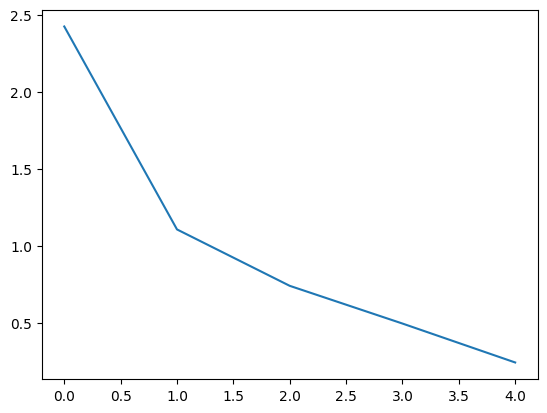

In [20]:
plt.plot(sorted_eigenvalues)

In [21]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

In [22]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

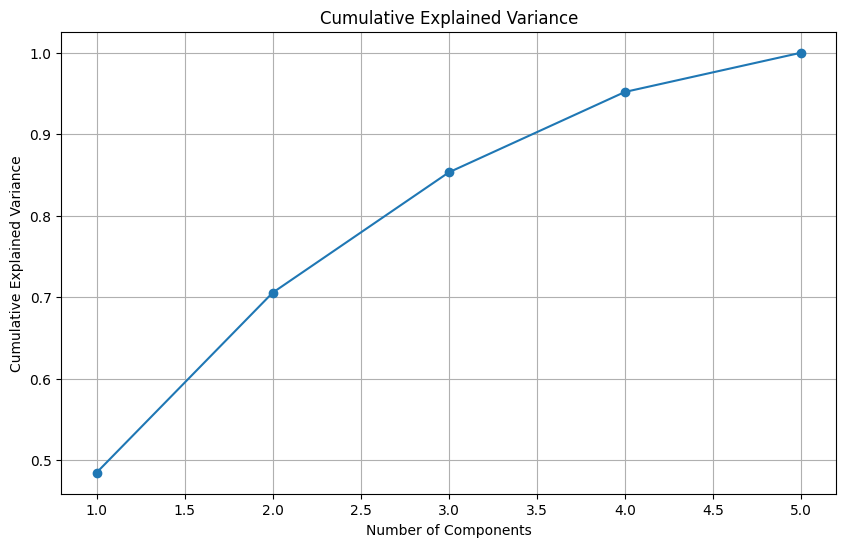

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

This plot will show how much variance is explained by each additional eigenvalue or principal component.Let's say we decided to keep the the PCs with an eigenvalue bigger than 1. This is a popular decision rule, which in this case leads to having 2 principal components. Let's see how we can do that and how to interpret all this, but first, let's move over to scikit learn. This library has very easy-to-use PCA capabilities, and very easy to use. Let's look at how it's done!

## **3. PCA in scikit learn**

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=5)

In [26]:
pca.fit(scaled_df)

PCA(n_components=5)

In [27]:
eigenvalues = pca.explained_variance_

In [58]:
variance_explained = pca.explained_variance_ratio_

In [59]:
 print(variance_explained)

[0.48449359 0.22093498 0.14769611 0.09872226 0.04815306]


In [28]:
print("Eigenvalues (explained variance):", eigenvalues)

Eigenvalues (explained variance): [2.53258013 1.15488739 0.77204783 0.5160482  0.25170918]


In [29]:
cumulative_sum = np.cumsum(eigenvalues)
print("Cumulative sum of eigenvalues:", cumulative_sum)

Cumulative sum of eigenvalues: [2.53258013 3.68746752 4.45951535 4.97556354 5.22727273]


Let's say we've decided to keep 2 Principal components. Conveniently, there is the arguments n_components in the PCA function. Additionally, as you saw, the eigenvalues are already sorted according to their size!

Run the cells below to get the first two principal components of our dataset using sklearn.

In [30]:
pca_2 = PCA(n_components=2)
pca_2.fit(scaled_df)

PCA(n_components=2)

In [31]:
eig_values = pca_2.explained_variance_

In [55]:
variance_explained = pca_2.explained_variance_ratio_

In [56]:
 print(variance_explained)

[0.48449359 0.22093498]


In [57]:
eig_vectors = pca_2.components_
eig_vectors

array([[ 0.49614868,  0.57570231,  0.33956956,  0.22498981,  0.50643404],
       [ 0.30861972,  0.04380176,  0.43080905, -0.79677694, -0.28702846]])

In [61]:
cumulative_sum = np.cumsum(eig_values)
print("Cumulative sum of eig_values:", cumulative_sum)

Cumulative sum of eig_values: [2.53258013 3.68746752]


As seen before, 70% of the variance in the data can still be explained by just having the 2 principal components that replace the 5 variables!

## **4. Relationship with the original variables**

In [33]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [34]:
structure_loading_1 = pc1 * np.sqrt(eig_values[0])

In [35]:
structure_loading_1_series = pd.Series(structure_loading_1, index=data.columns)

In [36]:
sorted_structure_loading_1 = structure_loading_1_series.sort_values(ascending=False)

Repeat for pincipal component 2

In [37]:
structure_loading_2 = pc2 * np.sqrt(eig_values[0])

In [38]:
structure_loading_2_series = pd.Series(structure_loading_2, index=data.columns)

In [39]:
sorted_structure_loading_2 = structure_loading_2_series.sort_values(ascending=False)

In [43]:
print (sorted_structure_loading_1)

Burger      0.916177
Tomatoes    0.805943
Bread       0.789575
Milk        0.540394
Oranges     0.358051
dtype: float64


In [44]:
print (sorted_structure_loading_2)

Milk        0.685593
Bread       0.491140
Burger      0.069706
Tomatoes   -0.456779
Oranges    -1.267997
dtype: float64


## **5. The new data**

In [64]:
PC_df = pd.DataFrame(pca_2.transform(scaled_df), index=data.index, columns=['PC1','PC2'])

In [65]:
PC_df

,PC1,PC2
City,,
ATLANTA,-0.232315,2.237819
BALTIMORE,0.288023,1.926235
BOSTON,2.298492,0.075243
BUFFALO,-0.348852,-1.129927
CHICAGO,0.116322,-0.088027
CINCINNATI,0.605998,0.461222
CLEVELAND,-1.242714,-1.335505
DALLAS,-1.121562,-0.859501
DETROIT,-0.280792,-1.347375


PCA provides a great, intuitive way for us to transform our dataset into a format where the predictors are uncorrelated, as well as to reduce dimensionality by dropping less important components.